In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
dataset = pd.read_csv(r"C:\Users\singh\OneDrive\Desktop\datascience\Neural networks\Alphabets_data.csv")

In [3]:
dataset

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
# Generate various summary statistics
print(dataset.describe())

               xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.38082

In [5]:
# EDA
# Checking for duplicate rows
dataset[dataset.duplicated(keep='last')]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
22,S,3,2,3,3,2,8,8,7,5,7,5,7,2,8,9,8
37,P,3,6,4,4,2,4,14,8,1,11,6,3,0,10,4,8
51,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
60,N,3,3,3,5,2,7,7,13,2,5,6,8,5,8,0,8
67,E,2,3,3,2,2,7,7,5,7,7,6,8,2,8,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18863,H,1,0,1,0,0,7,8,10,1,7,6,8,2,8,0,8
18981,I,1,10,0,7,0,7,7,4,4,7,6,8,0,8,0,8
19077,A,1,0,2,0,0,7,4,2,0,7,2,8,2,7,1,8
19454,T,1,0,2,0,0,7,14,2,3,7,10,8,0,8,0,8


In [6]:
dataset = dataset.drop_duplicates(keep='first')

In [7]:
# Checking for duplicated rows
dataset[dataset.duplicated(keep='last')]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex


In [8]:
dataset.shape

(18668, 17)

In [9]:
# Checking for Null values
dataset[dataset.isnull().any(axis=1)]
# No null value found.

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex


In [10]:
# class distribution
print(dataset.groupby('letter').size())

letter
A    756
B    730
C    710
D    760
E    725
F    752
G    743
H    704
I    524
J    715
K    718
L    673
M    732
N    688
O    718
P    782
Q    760
R    737
S    729
T    748
U    768
V    706
W    726
X    678
Y    746
Z    640
dtype: int64


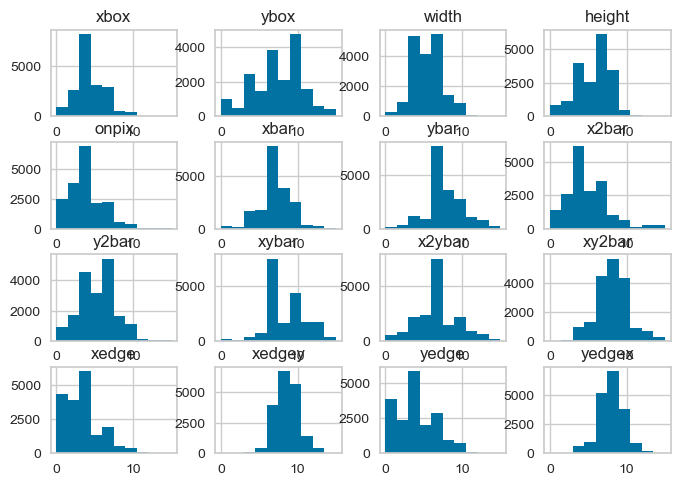

In [11]:
# histograms
dataset.hist()
plt.show()
     

In [12]:
dataset.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [13]:
from sklearn.preprocessing import LabelEncoder

# Select the column to encode 
column_to_encode = 'letter'

# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode the column
dataset[column_to_encode] = encoder.fit_transform(dataset[column_to_encode])

# Print the encoded dataset 
dataset.head()

C:\Users\singh\AppData\Local\Temp\ipykernel_12416\4177880350.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column_to_encode] = encoder.fit_transform(dataset[column_to_encode])


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [14]:
from sklearn.preprocessing import StandardScaler

# Separate numerical features
numerical_features = ['xbox', 'ybox','width','height','onpix','xbar','ybar','x2bar','y2bar','xybar','x2ybar','xy2bar','xedge','xedgey','yedge','yedgex']

# Combine encoded categorical features with numerical features
dataset1 = pd.concat([dataset[numerical_features]], axis=1)

# Apply normalization on numerical features
scaler = StandardScaler()  
dataset1[numerical_features] = scaler.fit_transform(dataset[numerical_features])

# Print the normalized dataset 
dataset1.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1.144417,0.237070,-1.178294,-0.232716,-1.231474,0.531756,2.358246,-1.746100,0.344235,-0.953149,1.351557,0.035798,-1.347535,-0.223412,-1.494712,0.130096
1,0.451855,1.491943,-1.178294,0.685459,-0.768617,1.515924,-1.090370,0.158195,-0.517819,1.882192,-1.315513,0.510429,-0.486890,-0.223412,0.079965,1.336868
2,-0.080235,1.178224,0.372167,1.144546,1.082808,1.515924,-0.659293,-0.984382,0.344235,0.667046,-1.315513,-0.438833,-0.056568,-0.858409,-0.313704,0.733482
3,1.516037,1.178224,0.372167,0.226371,-0.305761,-0.944497,0.633938,-0.222664,0.344235,-1.763246,-0.934503,0.985060,1.234399,1.046582,-0.707373,0.130096
4,-1.144417,-1.958957,-1.178294,-2.069066,-1.231474,0.531756,-0.659293,0.539054,0.344235,-0.953149,-0.553493,0.510429,-0.917213,-0.858409,0.473635,1.336868


In [15]:
array = dataset.values
array1 = dataset1.values

In [16]:
X = array1[:]
Y = array[:, 0]

In [17]:
X

array([[-1.14441743,  0.23706997, -1.17829391, ..., -0.22341228,
        -1.4947118 ,  0.13009585],
       [ 0.45185548,  1.49194265, -1.17829391, ..., -0.22341228,
         0.07996539,  1.33686814],
       [-0.08023549,  1.17822448,  0.37216713, ..., -0.8584093 ,
        -0.3137039 ,  0.73348199],
       ...,
       [ 1.51603743,  0.86450631,  1.40580782, ...,  0.41158474,
        -0.3137039 , -0.4732903 ],
       [ 0.98394646,  0.55078814,  0.37216713, ...,  2.3165758 ,
        -0.7073732 , -2.28344875],
       [-0.08023549,  0.55078814,  0.37216713, ..., -0.8584093 ,
        -0.7073732 ,  0.13009585]])

In [18]:
Y

array([19,  8,  3, ...,  2, 19,  0], dtype=int64)

In [19]:
print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', Y.shape)

X matrix dimensionality: (18668, 16)
Y vector dimensionality: (18668,)


In [20]:
# split the data into a training set and a test set
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.20,
                                                                                random_state=10, stratify=Y)

In [21]:
print("X_train: ", X_train.shape)
print("X_validation: ", X_validation.shape)
print("Y_train: ", Y_train.shape)
print("Y_validation: ", Y_validation.shape)

X_train:  (14934, 16)
X_validation:  (3734, 16)
Y_train:  (14934,)
Y_validation:  (3734,)


In [22]:
dec_tree = DecisionTreeClassifier()

In [23]:
cm = ConfusionMatrix(dec_tree, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

     

0.8663631494376004

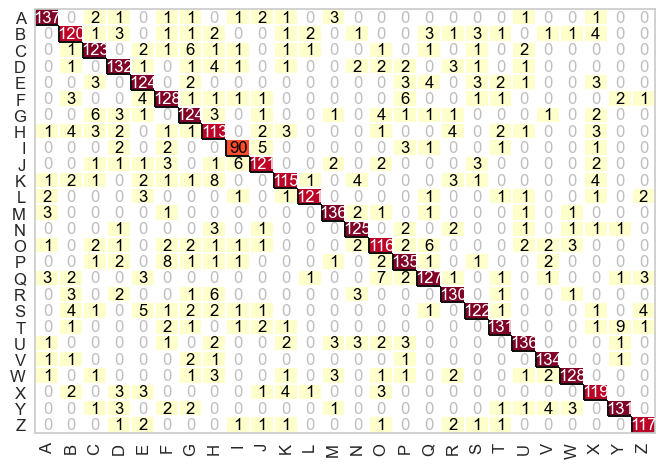

In [24]:
# train the model using the training sets
cm.fit(X_train, Y_train)

cm.score(X_validation, Y_validation)

In [25]:

# predict the responses for test dataset
predictions = cm.predict(X_validation)

In [26]:
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.8663631494376004


In [27]:
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[137   0   2   1   0   1   1   0   1   2   1   0   3   0   0   0   0   0
    0   0   1   0   0   1   0   0]
 [  0 120   1   3   0   1   1   2   0   0   1   2   0   1   0   0   3   1
    3   1   0   1   1   4   0   0]
 [  0   1 123   0   2   1   6   1   1   0   1   1   0   0   1   0   1   0
    1   0   2   0   0   0   0   0]
 [  0   1   0 132   1   0   1   4   1   0   1   0   0   2   2   2   0   3
    1   0   1   0   0   0   0   0]
 [  0   0   3   0 124   0   2   0   0   0   0   0   0   0   0   3   4   0
    3   2   1   0   0   3   0   0]
 [  0   3   0   0   4 128   1   1   1   1   0   0   0   0   0   6   0   0
    1   1   0   0   0   0   2   1]
 [  0   0   6   3   1   0 124   3   0   1   0   0   1   0   4   1   1   1
    0   0   0   1   0   2   0   0]
 [  1   4   3   2   0   1   1 113   0   2   3   0   0   0   1   0   0   4
    0   2   1   0   0   3   0   0]
 [  0   0   0   2   0   2   0   0  90   5   0   0   0   0   0   3   1   0
    0   1   0   0   0   1   0   0]
 [  0   0   1   1  

In [28]:
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.90728   0.90728   0.90728       151
           1    0.83333   0.82192   0.82759       146
           2    0.84247   0.86620   0.85417       142
           3    0.84076   0.86842   0.85437       152
           4    0.82119   0.85517   0.83784       145
           5    0.82581   0.85333   0.83934       150
           6    0.82667   0.83221   0.82943       149
           7    0.74342   0.80142   0.77133       141
           8    0.84906   0.85714   0.85308       105
           9    0.87050   0.84615   0.85816       143
          10    0.87121   0.79861   0.83333       144
          11    0.95276   0.90299   0.92720       134
          12    0.90667   0.93151   0.91892       146
          13    0.88028   0.90580   0.89286       138
          14    0.81119   0.80556   0.80836       144
          15    0.83851   0.86538   0.85174       156
          16    0.86395   0.83553   0.84950       152
          17    0.87248   0

In [29]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
# GaussianNB
gaussianNB = GaussianNB()

In [32]:
cm = ConfusionMatrix(gaussianNB, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))
     

0.6389930369576862

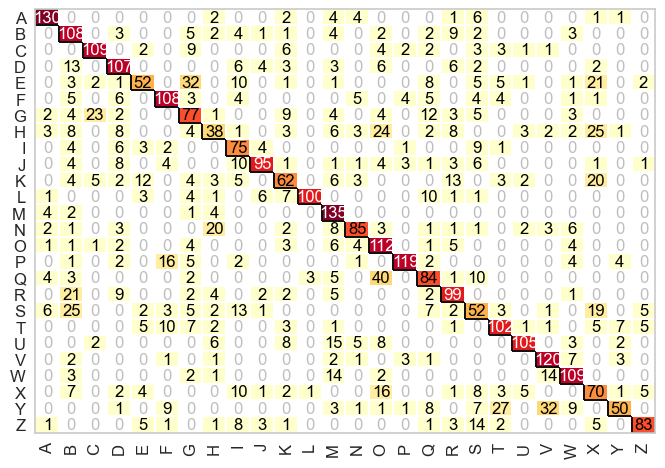

In [33]:
# train the model using the training sets
cm.fit(X_train, Y_train)

cm.score(X_validation, Y_validation)

In [34]:
# predict the responses for test dataset
predictions = cm.predict(X_validation)

In [35]:
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.6389930369576862


In [36]:
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[130   0   0   0   0   0   0   2   0   0   2   0   4   4   0   0   0   1
    6   0   0   0   0   1   1   0]
 [  0 108   0   3   0   0   5   2   4   1   1   0   4   0   2   0   2   9
    2   0   0   0   3   0   0   0]
 [  0   0 109   0   2   0   9   0   0   0   6   0   0   0   4   2   2   0
    3   3   1   1   0   0   0   0]
 [  0  13   0 107   0   0   0   0   6   4   3   0   3   0   6   0   0   6
    2   0   0   0   0   2   0   0]
 [  0   3   2   1  52   0  32   0  10   0   1   0   1   0   0   0   8   0
    5   5   1   0   1  21   0   2]
 [  0   5   0   6   0 108   3   0   4   0   0   0   0   5   0   4   5   0
    4   4   0   0   1   1   0   0]
 [  2   4  23   2   0   0  77   1   0   0   9   0   4   0   4   0  12   3
    5   0   0   0   3   0   0   0]
 [  3   8   0   8   0   0   4  38   1   0   3   0   6   3  24   0   2   8
    0   0   3   2   2  25   1   0]
 [  0   4   0   6   3   2   0   0  75   4   0   0   0   0   0   1   0   0
    9   1   0   0   0   0   0   0]
 [  0   4   0   8  

In [37]:
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.84416   0.86093   0.85246       151
           1    0.49315   0.73973   0.59178       146
           2    0.76761   0.76761   0.76761       142
           3    0.66049   0.70395   0.68153       152
           4    0.59091   0.35862   0.44635       145
           5    0.70130   0.72000   0.71053       150
           6    0.46386   0.51678   0.48889       149
           7    0.43182   0.26950   0.33188       141
           8    0.50676   0.71429   0.59289       105
           9    0.81197   0.66434   0.73077       143
          10    0.53448   0.43056   0.47692       144
          11    0.96154   0.74627   0.84034       134
          12    0.60538   0.92466   0.73171       146
          13    0.75221   0.61594   0.67729       138
          14    0.49558   0.77778   0.60541       144
          15    0.89474   0.76282   0.82353       156
          16    0.56376   0.55263   0.55814       152
          17    0.63057   0

In [38]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [39]:
# Neural network with back propagation along with hyperparameter tuning
 

In [40]:
!pip install keras

In [41]:
import tensorflow
tensorflow.__version__

'2.14.0'

In [42]:
import keras
from keras.models import Sequential
from tensorflow.keras import Sequential
from keras.layers import Dense

In [43]:

model = Sequential()
model.add(Dense(20, input_dim=16, activation='relu'))  
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [44]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                340       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 671 (2.62 KB)
Trainable params: 671 (2.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=200, batch_size=20)

Epoch 1/200
626/626 [==============================] - 2s 2ms/step - loss: -11763.9219 - accuracy: 0.0405 - val_loss: -67093.9922 - val_accuracy: 0.0364
Epoch 2/200
626/626 [==============================] - 1s 2ms/step - loss: -467198.3438 - accuracy: 0.0405 - val_loss: -1183552.7500 - val_accuracy: 0.0364
Epoch 3/200
626/626 [==============================] - 1s 2ms/step - loss: -2955305.7500 - accuracy: 0.0405 - val_loss: -5313721.5000 - val_accuracy: 0.0364
Epoch 4/200
626/626 [==============================] - 1s 2ms/step - loss: -9519452.0000 - accuracy: 0.0405 - val_loss: -14456346.0000 - val_accuracy: 0.0364
Epoch 5/200
626/626 [==============================] - 1s 2ms/step - loss: -22266554.0000 - accuracy: 0.0405 - val_loss: -30709326.0000 - val_accuracy: 0.0364
Epoch 6/200
626/626 [==============================] - 1s 2ms/step - loss: -43151244.0000 - accuracy: 0.0405 - val_loss: -55817300.0000 - val_accuracy: 0.0364
Epoch 7/200
626/626 [==============================] - 1s 

626/626 [==============================] - 1s 2ms/step - loss: -55354187776.0000 - accuracy: 0.0405 - val_loss: -56288870400.0000 - val_accuracy: 0.0364
Epoch 52/200
626/626 [==============================] - 1s 2ms/step - loss: -59246604288.0000 - accuracy: 0.0405 - val_loss: -60210913280.0000 - val_accuracy: 0.0364
Epoch 53/200
626/626 [==============================] - 1s 2ms/step - loss: -63330983936.0000 - accuracy: 0.0405 - val_loss: -64329015296.0000 - val_accuracy: 0.0364
Epoch 54/200
626/626 [==============================] - 1s 2ms/step - loss: -67629744128.0000 - accuracy: 0.0405 - val_loss: -68663435264.0000 - val_accuracy: 0.0364
Epoch 55/200
626/626 [==============================] - 1s 2ms/step - loss: -72148508672.0000 - accuracy: 0.0405 - val_loss: -73206095872.0000 - val_accuracy: 0.0364
Epoch 56/200
626/626 [==============================] - 1s 2ms/step - loss: -76892995584.0000 - accuracy: 0.0405 - val_loss: -77984407552.0000 - val_accuracy: 0.0364
Epoch 57/200
626/

Epoch 100/200
626/626 [==============================] - 1s 2ms/step - loss: -618895900672.0000 - accuracy: 0.0405 - val_loss: -619524259840.0000 - val_accuracy: 0.0364
Epoch 101/200
626/626 [==============================] - 1s 2ms/step - loss: -641917517824.0000 - accuracy: 0.0405 - val_loss: -642390622208.0000 - val_accuracy: 0.0364
Epoch 102/200
626/626 [==============================] - 1s 2ms/step - loss: -665501827072.0000 - accuracy: 0.0405 - val_loss: -665871450112.0000 - val_accuracy: 0.0364
Epoch 103/200
626/626 [==============================] - 1s 2ms/step - loss: -689704468480.0000 - accuracy: 0.0405 - val_loss: -689981489152.0000 - val_accuracy: 0.0364
Epoch 104/200
626/626 [==============================] - 1s 2ms/step - loss: -714548838400.0000 - accuracy: 0.0405 - val_loss: -714701930496.0000 - val_accuracy: 0.0364
Epoch 105/200
626/626 [==============================] - 1s 2ms/step - loss: -739987226624.0000 - accuracy: 0.0405 - val_loss: -740006035456.0000 - val_acc

626/626 [==============================] - 1s 2ms/step - loss: -2631484571648.0000 - accuracy: 0.0405 - val_loss: -2618875445248.0000 - val_accuracy: 0.0364
Epoch 149/200
626/626 [==============================] - 1s 2ms/step - loss: -2698111090688.0000 - accuracy: 0.0405 - val_loss: -2684949626880.0000 - val_accuracy: 0.0364
Epoch 150/200
626/626 [==============================] - 1s 2ms/step - loss: -2766008483840.0000 - accuracy: 0.0405 - val_loss: -2752397705216.0000 - val_accuracy: 0.0364
Epoch 151/200
626/626 [==============================] - 1s 2ms/step - loss: -2835213189120.0000 - accuracy: 0.0405 - val_loss: -2821015732224.0000 - val_accuracy: 0.0364
Epoch 152/200
626/626 [==============================] - 1s 2ms/step - loss: -2905714196480.0000 - accuracy: 0.0405 - val_loss: -2890955751424.0000 - val_accuracy: 0.0364
Epoch 153/200
626/626 [==============================] - 1s 2ms/step - loss: -2977597489152.0000 - accuracy: 0.0405 - val_loss: -2962256822272.0000 - val_accur

Epoch 196/200
626/626 [==============================] - 1s 2ms/step - loss: -7537267572736.0000 - accuracy: 0.0405 - val_loss: -7479359438848.0000 - val_accuracy: 0.0364
Epoch 197/200
626/626 [==============================] - 1s 2ms/step - loss: -7683261333504.0000 - accuracy: 0.0405 - val_loss: -7623871561728.0000 - val_accuracy: 0.0364
Epoch 198/200
626/626 [==============================] - 1s 2ms/step - loss: -7831529455616.0000 - accuracy: 0.0405 - val_loss: -7770723057664.0000 - val_accuracy: 0.0364
Epoch 199/200
626/626 [==============================] - 1s 2ms/step - loss: -7981887913984.0000 - accuracy: 0.0405 - val_loss: -7919489777664.0000 - val_accuracy: 0.0364
Epoch 200/200
626/626 [==============================] - 1s 2ms/step - loss: -8134301057024.0000 - accuracy: 0.0405 - val_loss: -8070243024896.0000 - val_accuracy: 0.0364


In [47]:
# evaluate the model
scores = model.evaluate(X, Y)
print(model.metrics_names)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print(scores)

584/584 [==============================] - 1s 968us/step - loss: -8164846075904.0000 - accuracy: 0.0391
['loss', 'accuracy']
accuracy: 3.91%
[-8164846075904.0, 0.03910434991121292]


In [48]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

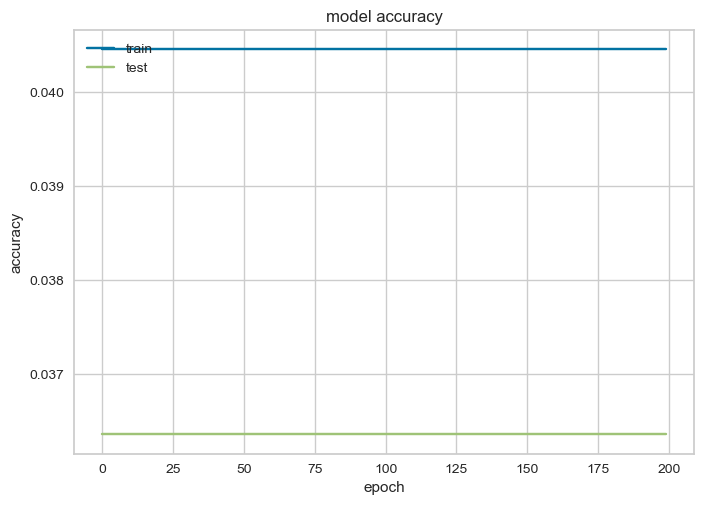

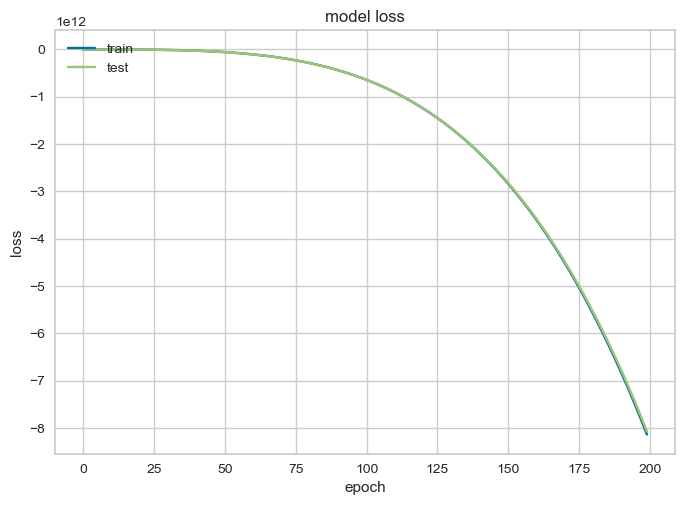

In [49]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
# Hyperparameter tuning using GridSearch
#        Batch Size
#         Epochs

In [51]:
pip install scikeras

  Obtaining dependency information for keras>=3.2.0 from https://files.pythonhosted.org/packages/46/43/03fa53f027e78af4a6bee3564d05cb34d9f5b924dc69c85f8ef5cb950ff1/keras-3.4.1-py3-none-any.whl.metadata
  Using cached keras-3.4.1-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.4.1-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 3.4.1 which is incompatible.


In [52]:
pip install tensorflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.14.0 which is incompatible.



  Obtaining dependency information for keras<2.15,>=2.14.0 from https://files.pythonhosted.org/packages/fe/58/34d4d8f1aa11120c2d36d7ad27d0526164b1a8ae45990a2fede31d0e59bf/keras-2.14.0-py3-none-any.whl.metadata
  Using cached keras-2.14.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
